<a href="https://colab.research.google.com/github/Keerthana-Sen/Feynn-Labs/blob/main/sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.gridspec import GridSpec


In [4]:
df=pd.read_csv("sleep1.csv")
df.head(5)

,Timestamp,Name (not mandatory),Age,Gender,Height,Weight,sleep_duration,sleep_consistency,sleep_rating,sleep_factors,waking,academics,reason,medications
0,08-03-2023 15:43,Unknown,21,Male,169,70,7 hours or more,Yes,4,"light, Noise",Maybe,Significantly,My sleep schedule is proper,No
1,8-15-2023 20:32:47,Mithun,21,Male,168,77,7 hours or more,No,4,No factors,Maybe,Moderately,My sleep schedule is proper,No
2,8-15-2023 20:33:06,NaN,21,Male,174,61,6 hours,No,3,"light, discomfort, Noise",No,Not at all,"1, 2",No
3,8-15-2023 20:33:18,Keerthana Sen,21,Female,156,49,7 hours or more,Yes,4,No factors,Yes,Significantly,My sleep schedule is proper,No
4,8-15-2023 20:33:41,Deepika Reddy,20,Female,159,48,6 hours,No,3,"light, discomfort, Noise",No,Slightly,"3, 1, 2",No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp             217 non-null    object
 1   Name (not mandatory)  98 non-null     object
 2   Age                   217 non-null    int64 
 3   Gender                217 non-null    object
 4   Height                217 non-null    object
 5   Weight                217 non-null    object
 6   sleep_duration        217 non-null    object
 7   sleep_consistency     217 non-null    object
 8   sleep_rating          217 non-null    int64 
 9   sleep_factors         217 non-null    object
 10  waking                217 non-null    object
 11  academics             217 non-null    object
 12  reason                217 non-null    object
 13  medications           217 non-null    object
dtypes: int64(2), object(12)
memory usage: 23.9+ KB


Changing data Types
(reason-> when using describe function, object datatype is not considered even if the value is actually number)


In [ ]:
df['sleep_duration'] = df['sleep_duration'].replace('[a-zA-Z]', '', regex=True)
df['sleep_duration']
df.sleep_duration = df.sleep_duration.astype(float)
df['sleep_duration']



0      7.0
1      7.0
2      6.0
3      7.0
4      6.0
      ... 
212    7.0
213    7.0
214    7.0
215    7.0
216    7.0
Name: sleep_duration, Length: 217, dtype: float64

In [ ]:
df['Weight']

0      70
1      77
2      61
3      49
4      48
       ..
212    78
213    55
214    62
215    60
216    68
Name: Weight, Length: 217, dtype: object

In [ ]:
df.columns

Index(['Timestamp', 'Name (not mandatory)', 'Age', 'Gender', 'Height',
       'Weight', 'sleep_duration', 'sleep_consistency', 'sleep_rating',
       'sleep_factors', 'waking', 'academics', 'reason', 'medications'],
      dtype='object')

Here Academics number provided is based on ranking , 1 being the lowest and 5 being the highest


In [ ]:
df.describe()

,Age,sleep_rating
count,217.000000,217.000000
mean,19.709677,3.428571
std,1.131841,0.863731
min,17.000000,1.000000
25%,19.000000,3.000000
50%,20.000000,3.000000
75%,21.000000,4.000000
max,22.000000,5.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['sleep_rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['sleep_rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['Age', 'sleep_rating']]], **{})
chart

In [ ]:
df.describe(exclude=np.number)

,Timestamp,Name (not mandatory),Gender,Height,Weight,sleep_duration,sleep_consistency,sleep_factors,waking,academics,reason,medications
count,217,98,217,217,217,217,217,217,217,217,217,217
unique,155,98,2,55,63,4,3,25,3,5,34,8
top,09-05-2023 12:08,Unknown,Male,180,60,6 hours,No,No factors,Maybe,Significantly,"Social Media Platforms (Netflix, Instagram etc...",No
freq,19,1,137,15,16,110,118,84,92,79,33,203


Plotting a heatmap


<Axes: >

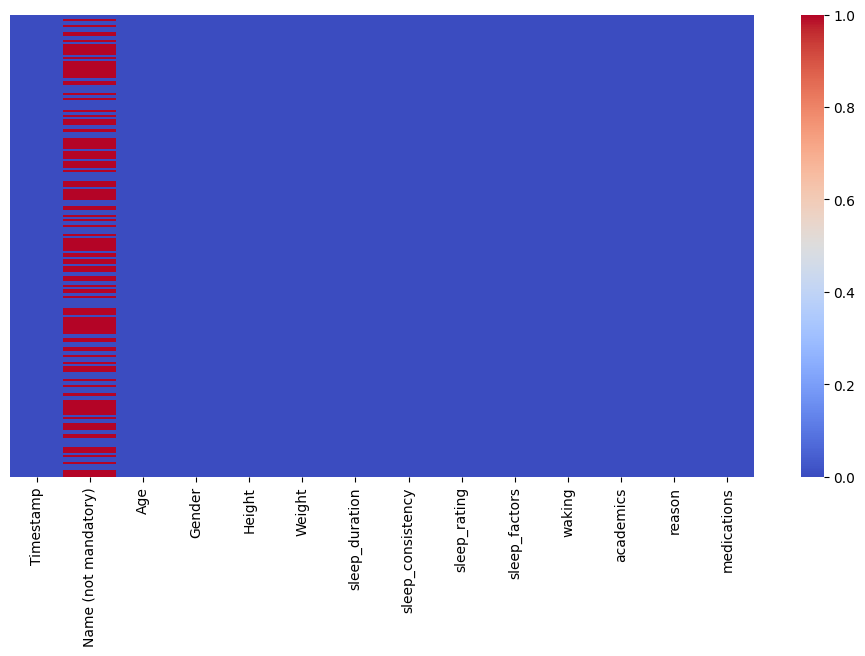

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False,cbar=True,cmap='coolwarm')

Questions:
1. Does sleep duration and Acadamics have any relation?
2. Does sleep duration and sleep rating related?
3. is there a relation between sleep rating and sleep factors(factors like light affecting their continous sleep)
4. Does sleep rating and academics have any relation



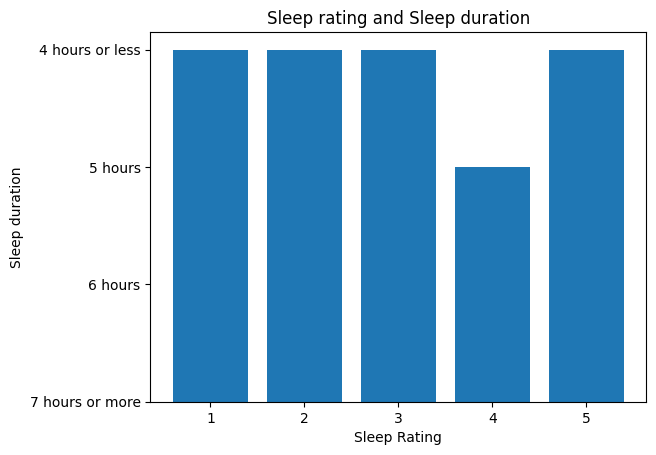

In [5]:
plt.bar(df['sleep_rating'], df['sleep_duration'])
plt.xlabel('Sleep Rating')
plt.ylabel('Sleep duration')
plt.title('Sleep rating and Sleep duration')
plt.show()


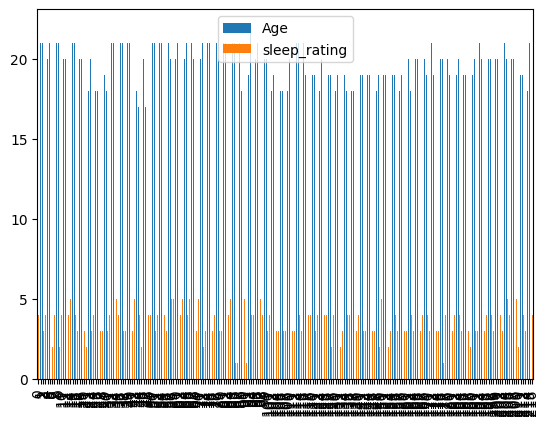

In [20]:
df_bar=df.plot(kind='bar')
plt.show()

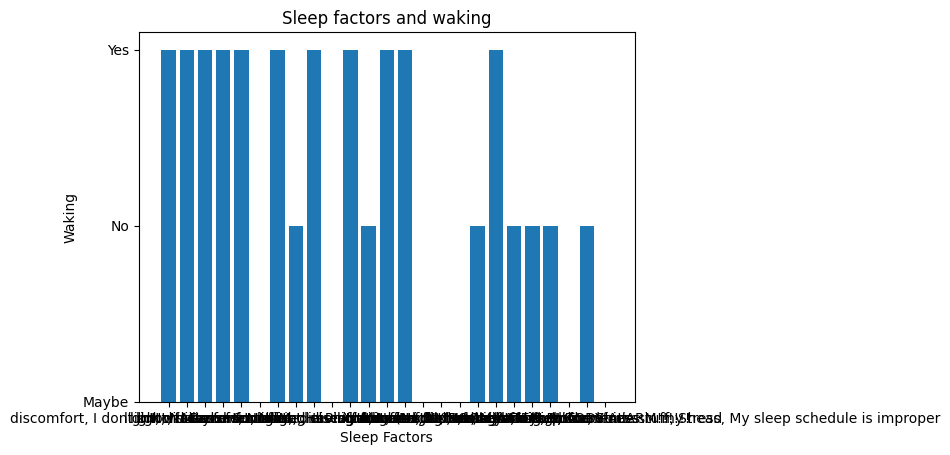

In [22]:
plt.bar(df['sleep_factors'], df['waking'])
plt.xlabel('Sleep consistency')
plt.ylabel('Waking')
plt.title('Sleep factors and waking')
plt.show()


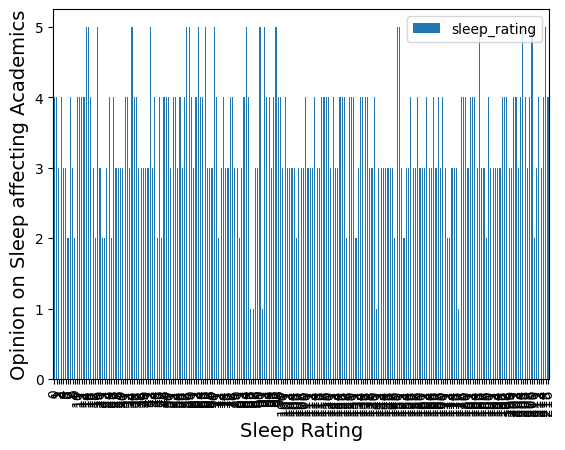

In [ ]:
df_bar1=df[['sleep_rating','academics']].plot(kind ='bar')
df_bar1.set_xlabel("Sleep Rating", fontsize=14)
df_bar1.set_ylabel("Opinion on Sleep affecting Academics", fontsize=14)
plt.show()

In [ ]:
df.sleep_rating.nunique()

5

In [ ]:
acl_fig=px.histogram(df,x="sleep_duration")
acl_fig.show()

Conclusion: Around 50% of the students get sleep of 6hr hours

In [6]:
acl_fig=px.histogram(df,x="academics")
acl_fig.show()

In [ ]:
acl_fig=px.histogram(df,x="sleep_rating")
acl_fig.show()

In [ ]:
acl_fig=px.histogram(df,x="reason")
acl_fig.show()

In [ ]:
acl_fig=px.histogram(df,x="reason")
acl_fig.show()


1. Majority of the student's sleep are affected due to usage of social media platforms like netflix , instagram etc.
2. Most of the students have given the opinion that academic stuff is a reason for improper sleep schedule
The above to points can be proven by adding up the counts from the above graph


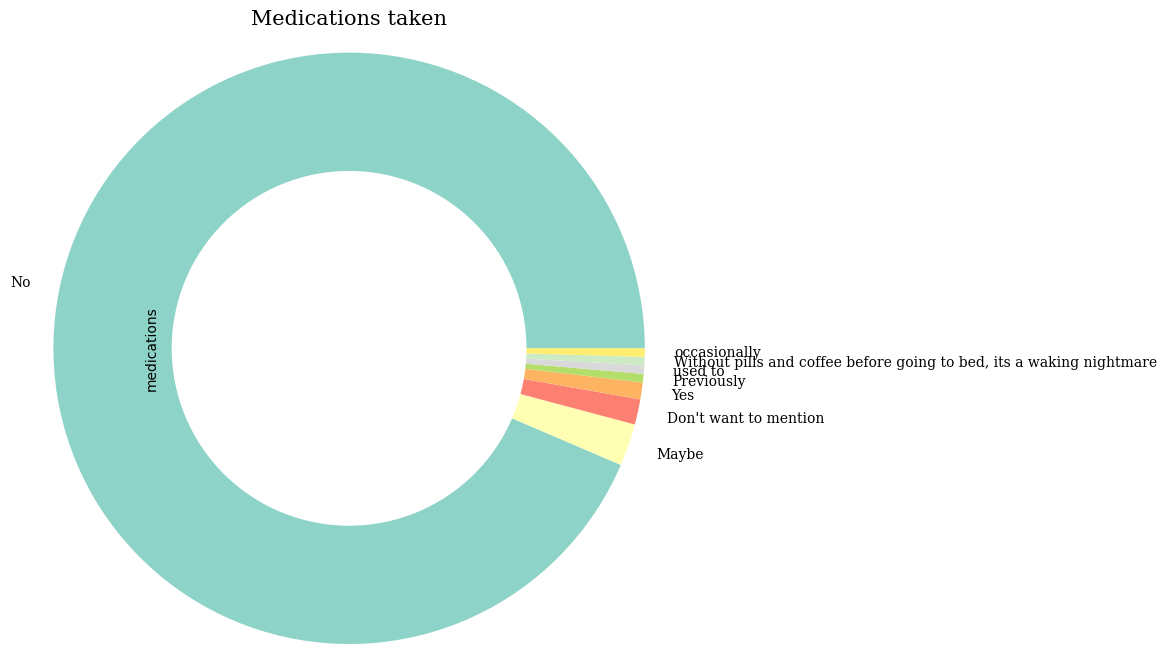

In [13]:
x=df['medications'].value_counts().plot.pie(radius=2, cmap='Set3', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Medications taken', family='serif', size='15', pad='100')
plt.show()


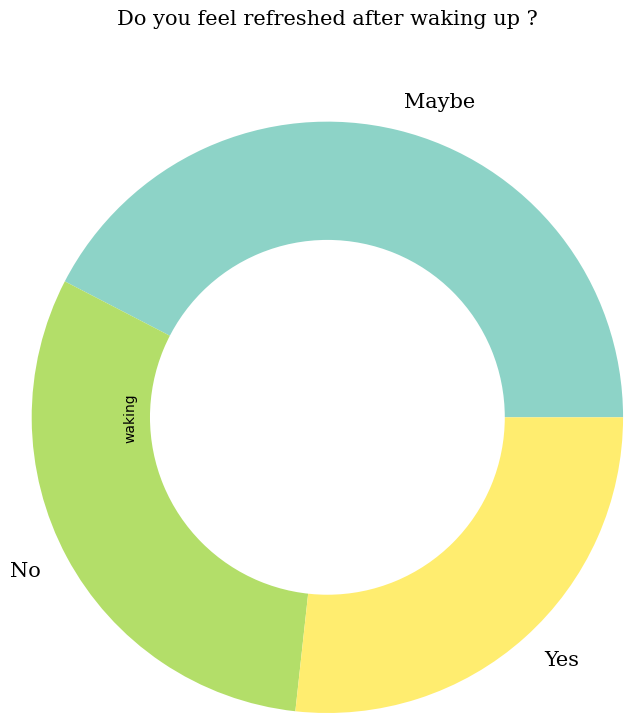

In [19]:
x=df['waking'].value_counts().plot.pie(radius=2, cmap='Set3', startangle=0, textprops=dict(family='serif', size='15'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Do you feel refreshed after waking up ?', family='serif', size='15', pad='150')
plt.show()

ValueError: ignored